In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

#from brokenaxes import brokenaxes
from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('C:\\Users\\ASUS\\Downloads\\Final Project\\song_data.csv')

In [4]:
df.head(10)

song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   
5            Bring Me To Life               80            235893   
6                 Last Resort               81            199893   
7    Are You Gonna Be My Girl               76            213800   
8              Mr. Brightside               80            222586   
9                 Sex on Fire               81            203346   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   
5      0.008950         0.316   0.945          0.000002    4    0.3960   
6      0.000504         0.581   0.887          0.001110    4    0.2680   
7      0.001480         0.613   0.953          0.000582    2    0.1520   
8      0.001080         0.330   0.936          0.000000    1    0.0926   
9      0.001720         0.542   0.905          0.010400    9    0.1360   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  
0    -4.095           1       0.0294  167.060               4          0.474  
1    -6.407           0       0.0498  105.256               4          0.370  
2    -7.828           1       0.0792  123.881               4          0.324  
3    -4.938           1       0.1070  122.444               4          0.198  
4    -5.065           1       0.0313  172.011               4          0.574  
5    -3.169           0       0.1240  189.931               4          0.320  
6    -3.659           0       0.0624   90.578               4          0.724  
7    -3.435           1       0.0855  105.046               4          0.537  
8    -3.660           1       0.0917  148.112               4          0.234  
9    -5.653           1       0.0540  153.398               4          0.374

In [5]:
df.drop(['song_name'], axis=1, inplace=True)

# Mengubah nilai negatif menjadi positif di kolom 'loudness'
df['loudness'] = df['loudness'].abs()

display(df.head())

target = 'song_popularity'
features = [i for i in df.columns if i not in [target]]

original_df = df.copy(deep=True)

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

song_popularity  song_duration_ms  acousticness  danceability  energy  \
0               73            262333      0.005520         0.496   0.682   
1               66            216933      0.010300         0.542   0.853   
2               76            231733      0.008170         0.737   0.463   
3               74            216933      0.026400         0.451   0.970   
4               56            223826      0.000954         0.447   0.766   

   instrumentalness  key  liveness  loudness  audio_mode  speechiness  \
0          0.000029    8    0.0589     4.095           1       0.0294   
1          0.000000    3    0.1080     6.407           0       0.0498   
2          0.447000    0    0.2550     7.828           1       0.0792   
3          0.003550    0    0.1020     4.938           1       0.1070   
4          0.000000   10    0.1130     5.065           1       0.0313   

     tempo  time_signature  audio_valence  
0  167.060               4          0.474  
1  105.256               4          0.370  
2  123.881               4          0.324  
3  122.444               4          0.198  
4  172.011               4          0.574


Inference: The Datset consists of 14 features & 18835 samples.


# DATA UNDERSTANDING:
1.song_name: Nama lagu.

2.song_popularity: Nilai popularitas lagu, biasanya berupa angka atau skor yang menunjukkan seberapa populer lagu tersebut.
3.song_duration_ms: Durasi lagu dalam satuan milidetik (ms).

4.acousticness: Nilai yang menunjukkan seberapa akustik lagu tersebut.

5.danceability: Nilai yang mengukur seberapa cocok lagu untuk digunakan sebagai lagu dansa.

6.energy: Nilai yang merepresentasikan intensitas dan aktivitas dalam lagu.

7.instrumentalness: Nilai yang menunjukkan seberapa besar lagu didominasi oleh instrumen musik dibandingkan vokal.

8.key: Kunci nada lagu, biasanya direpresentasikan dengan angka 0 hingga 11.

9.liveness: Nilai yang menunjukkan apakah lagu tersebut merupakan rekaman live atau studio.

10.loudness: Nilai yang menunjukkan kekerasan suara lagu dalam desibel (dB).

11.audio_mode: Mode audio lagu, biasanya bernilai 0 (minor) atau 1 (mayor).

12.speechiness: Nilai yang mengukur keberadaan kata-kata yang diucapkan dalam lagu.

13.tempo: Tempo lagu dalam Beat Per Minute (BPM).

14.time_signature: Tanda birama lagu.

15.audio_valence: Nilai yang menggambarkan positifitas lagu secara musikal.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_popularity   18835 non-null  int64  
 1   song_duration_ms  18835 non-null  int64  
 2   acousticness      18835 non-null  float64
 3   danceability      18835 non-null  float64
 4   energy            18835 non-null  float64
 5   instrumentalness  18835 non-null  float64
 6   key               18835 non-null  int64  
 7   liveness          18835 non-null  float64
 8   loudness          18835 non-null  float64
 9   audio_mode        18835 non-null  int64  
 10  speechiness       18835 non-null  float64
 11  tempo             18835 non-null  float64
 12  time_signature    18835 non-null  int64  
 13  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 2.0 MB


In [7]:
df.isnull().sum()

song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

In [8]:
df.nunique().sort_values(ascending=False)

tempo               12112
song_duration_ms    11771
loudness             8416
instrumentalness     3925
acousticness         3209
liveness             1425
audio_valence        1246
speechiness          1224
energy               1132
danceability          849
song_popularity       101
key                    12
time_signature          5
audio_mode              2
dtype: int64

In [9]:
#Checking number of unique rows in each feature

nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=16:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 10 numerical & 3 categorical features.


In [10]:
display(df.describe()) #cek statistik fitur

song_popularity  song_duration_ms  acousticness  danceability  \
count     18835.000000      1.883500e+04  18835.000000  18835.000000   
mean         52.991877      2.182116e+05      0.258539      0.633348   
std          21.905654      5.988754e+04      0.288719      0.156723   
min           0.000000      1.200000e+04      0.000001      0.000000   
25%          40.000000      1.843395e+05      0.024100      0.533000   
50%          56.000000      2.113060e+05      0.132000      0.645000   
75%          69.000000      2.428440e+05      0.424000      0.748000   
max         100.000000      1.799346e+06      0.996000      0.987000   

             energy  instrumentalness           key      liveness  \
count  18835.000000      18835.000000  18835.000000  18835.000000   
mean       0.644995          0.078008      5.289196      0.179650   
std        0.214101          0.221591      3.614595      0.143984   
min        0.001070          0.000000      0.000000      0.010900   
25%        0.510000          0.000000      2.000000      0.092900   
50%        0.674000          0.000011      5.000000      0.122000   
75%        0.815000          0.002570      8.000000      0.221000   
max        0.999000          0.997000     11.000000      0.986000   

           loudness    audio_mode   speechiness         tempo  time_signature  \
count  18835.000000  18835.000000  18835.000000  18835.000000    18835.000000   
mean       7.447934      0.628139      0.102099    121.073154        3.959119   
std        3.826860      0.483314      0.104378     28.714456        0.298533   
min        0.052000      0.000000      0.000000      0.000000        0.000000   
25%        4.908000      0.000000      0.037800     98.368000        4.000000   
50%        6.555000      1.000000      0.055500    120.013000        4.000000   
75%        9.044000      1.000000      0.119000    139.931000        4.000000   
max       38.768000      1.000000      0.941000    242.318000        5.000000   

       audio_valence  
count   18835.000000  
mean        0.527967  
std         0.244632  
min         0.000000  
25%         0.335000  
50%         0.527000  
75%         0.725000  
max         0.984000

# 2. Exploratory Data Analysis (EDA)

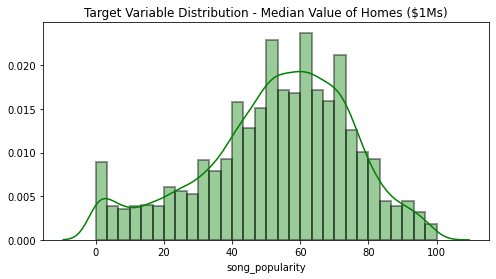

In [11]:
#cek distribusi dari target

plt.figure(figsize=[8,4])
sns.distplot(df[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

variabel target terlihat berdistribusi normal dengan rata2 60 unit.

                              Visualisasi Fitur-Fitur Kategorikal:                              


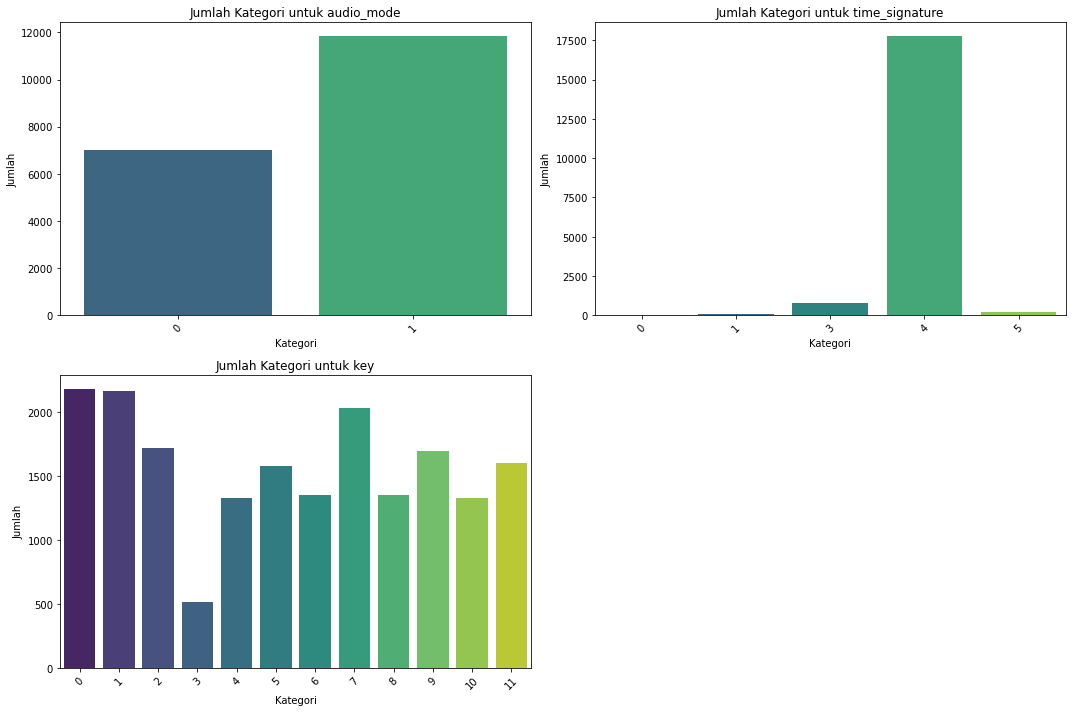

In [12]:
print('\033[1mVisualisasi Fitur-Fitur Kategorikal:'.center(100))

# Tentukan jumlah kolom dalam grid subplot
n = 2

# Hitung tinggi grid berdasarkan jumlah fitur
plt.figure(figsize=[15, 5 * math.ceil(len(cf) / n)])

for i in range(len(cf)):
    plt.subplot(math.ceil(len(cf) / n), n, i + 1)

    # Hitung jumlah kategori dalam fitur
    value_counts = df[cf[i]].value_counts(dropna=False)

    # Plot selalu vertikal dengan kategori di sumbu x
    sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")
    plt.xticks(rotation=45)  # Rotasi label x untuk keterbacaan

    plt.title(f'Jumlah Kategori untuk {cf[i]}', fontsize=12)
    plt.xlabel('Kategori', fontsize=10)
    plt.ylabel('Jumlah', fontsize=10)

plt.tight_layout()
plt.show()

fitur-fitur kategorikal ini cukup membantu dalam memberikan informasi tentang dataset

                                 Numeric Features Distribution                                  


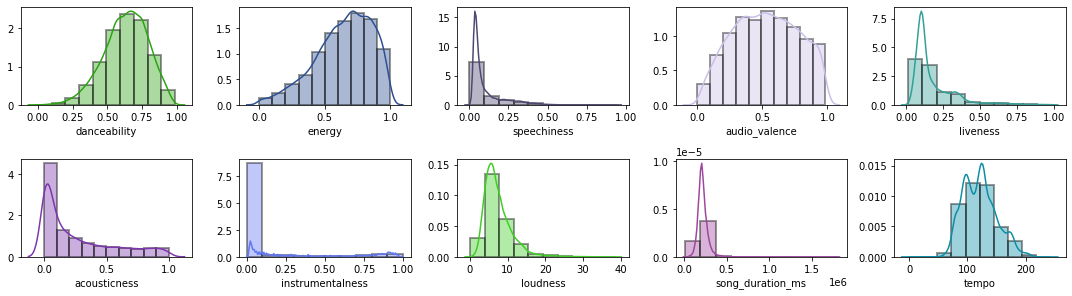

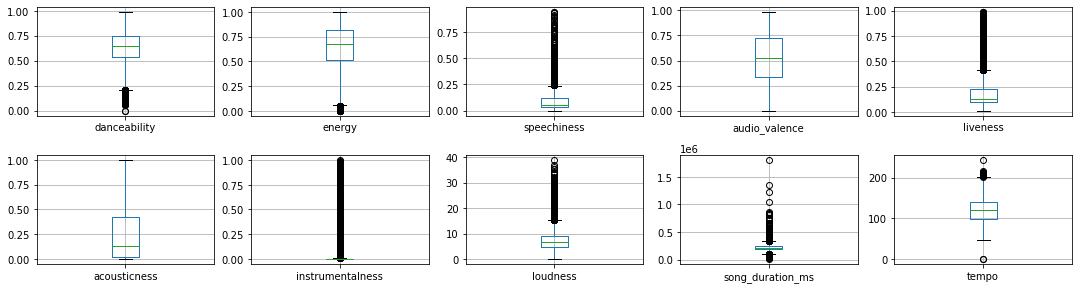

In [13]:
#Visualisasi fitur-fitur numerik

print('\033[1mNumeric Features Distribution'.center(100))

n=5

clr=['r','g','b','g','b','r']

plt.figure(figsize=[15,4*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    sns.distplot(df[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,4*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    df.boxplot(nf[i])
plt.tight_layout()
plt.show()

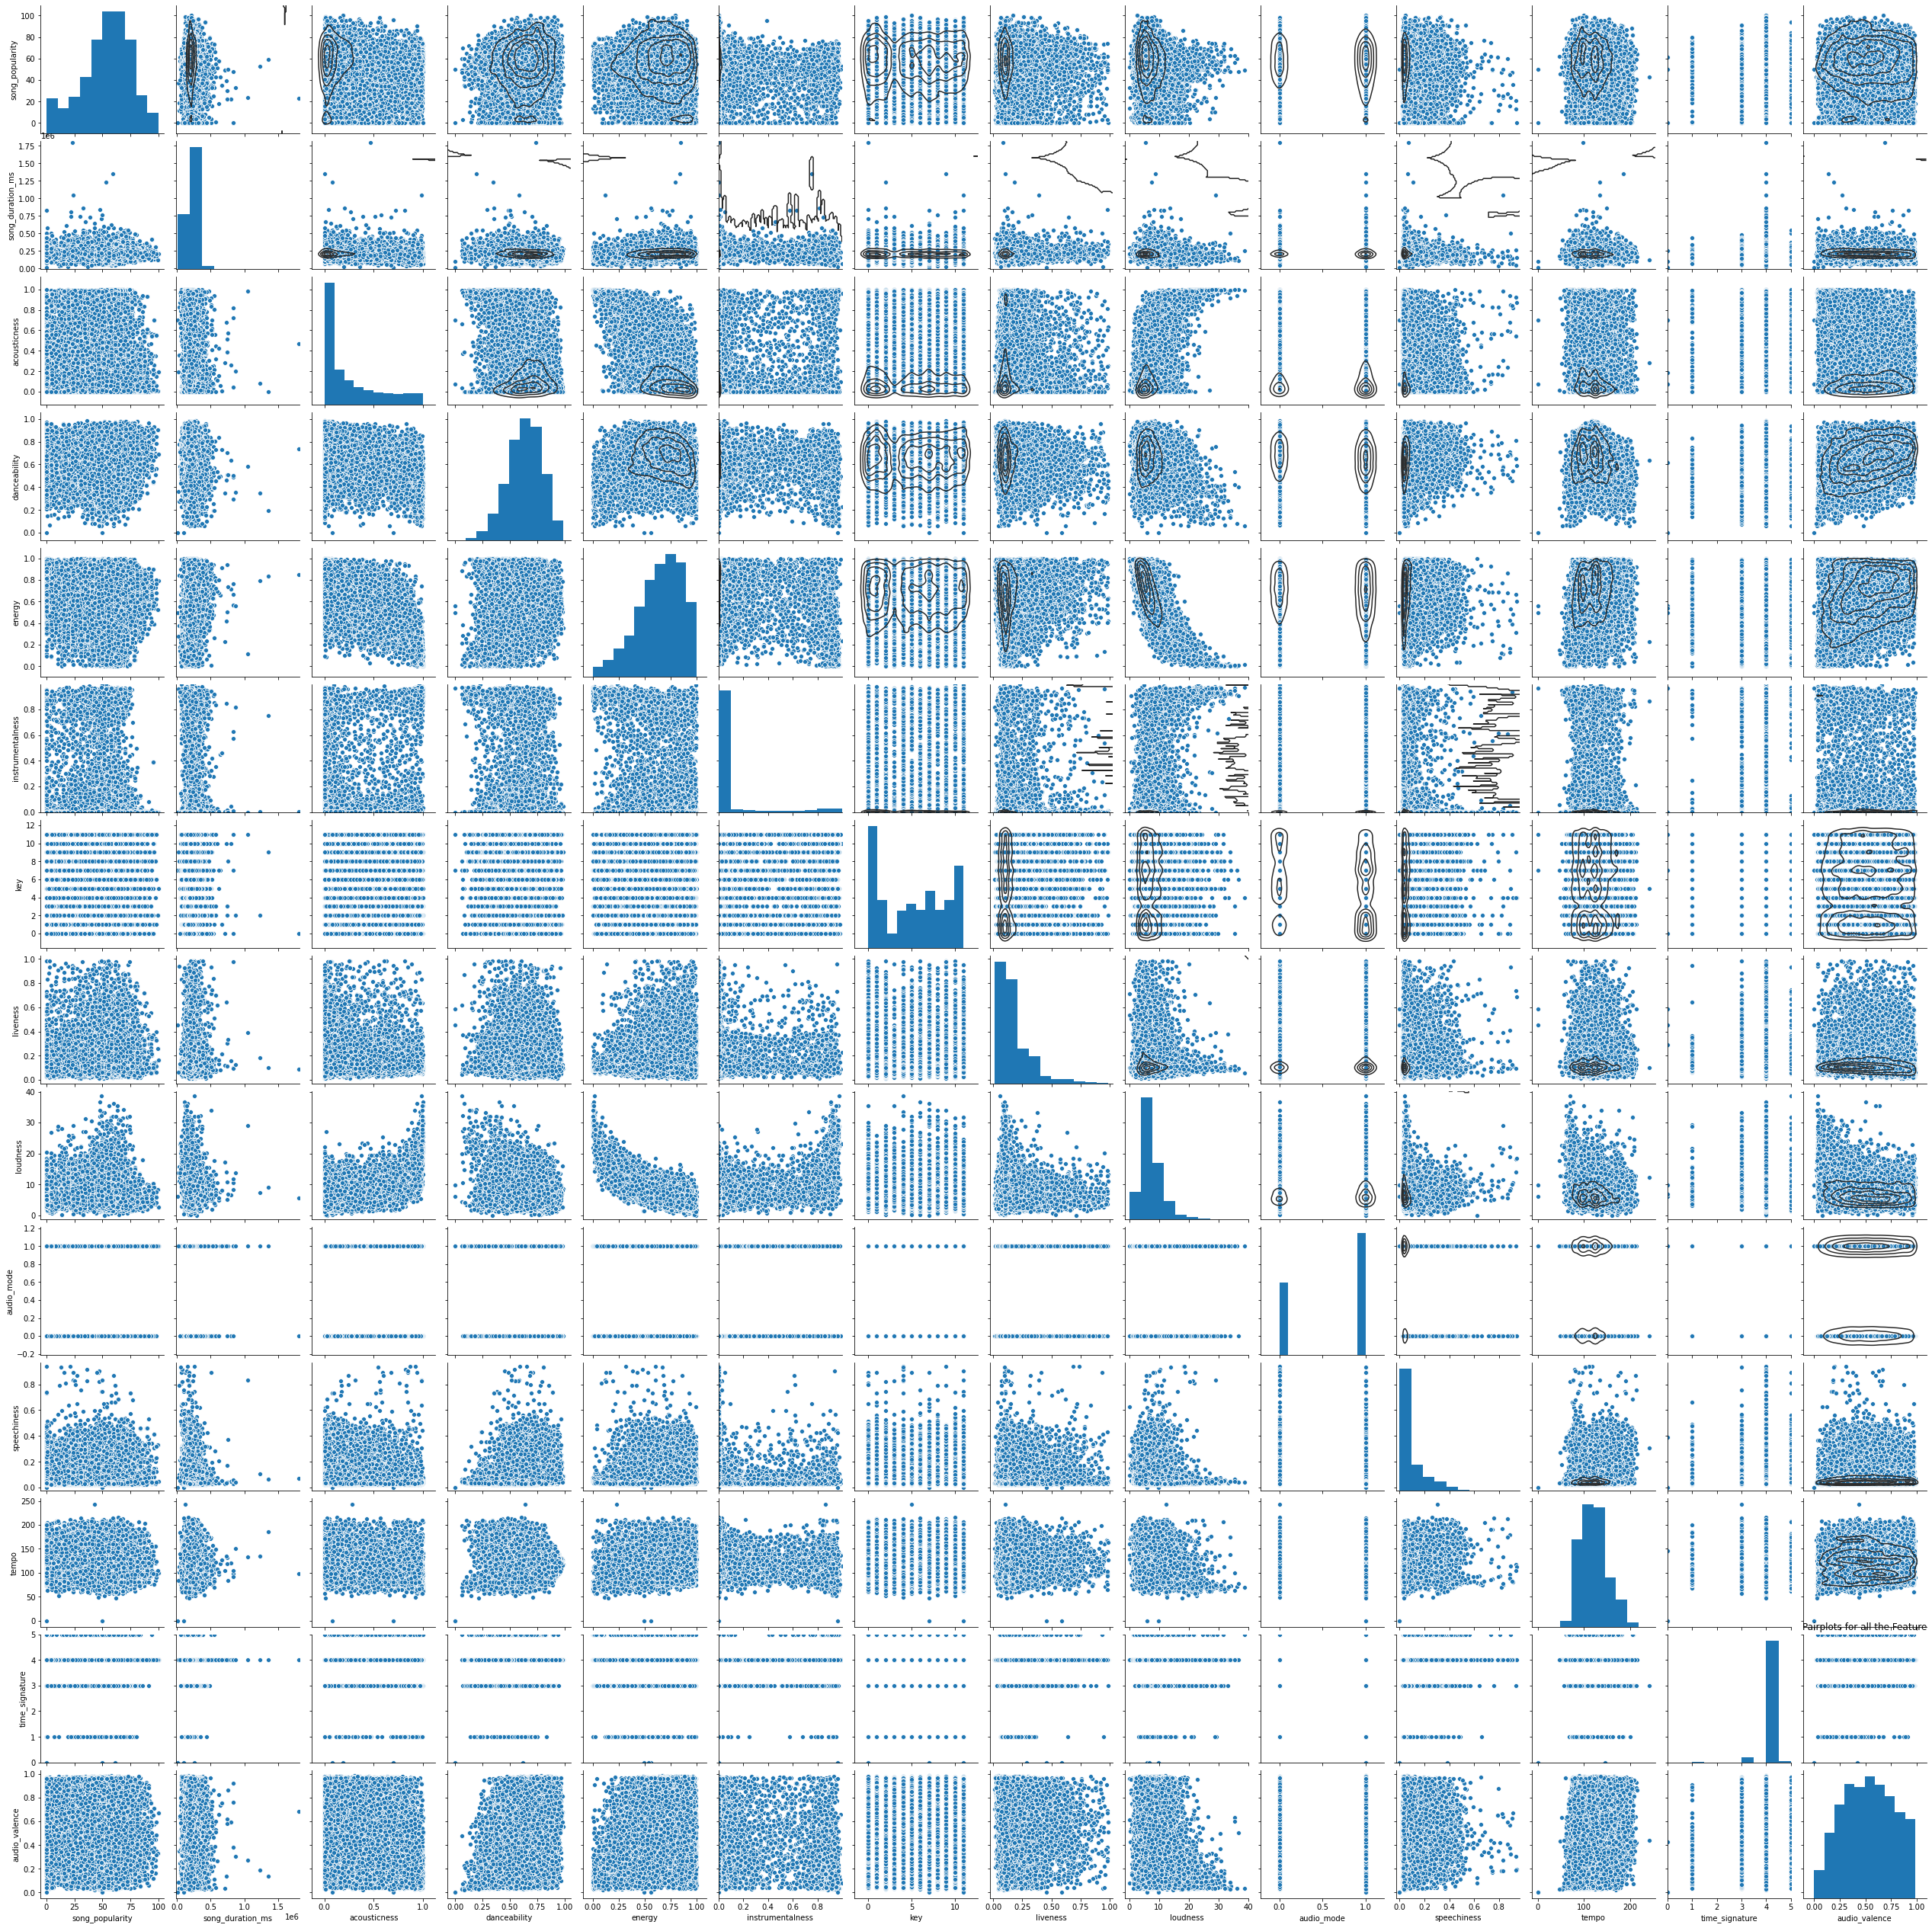

In [14]:
#hubungan disetiap fitur-fitur

g = sns.pairplot(df)
plt.title('Pairplots for all the Feature')
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

dari visualisasi tersebut, dapat kita ketahui bahwa terdapat banyak outlier pada datset ini. outlier -> titik data yang berbeda secara signifikan dari kebanyakan data lainnya dalam sebuah dataset.

# 3. Data Pre-Processing

In [15]:
#Removal of any Duplicate rows (if any)

counter = 0
rs,cs = original_df.shape

df.drop_duplicates(inplace=True)

if df.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-df.shape[0]}')


Inference: Number of duplicates dropped/fixed ---> 3911


In [16]:
#Check for empty elements

nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)

                  Total Null Values  Percentage
song_popularity                   0         0.0
song_duration_ms                  0         0.0
acousticness                      0         0.0
danceability                      0         0.0
energy                            0         0.0
instrumentalness                  0         0.0
key                               0         0.0
liveness                          0         0.0
loudness                          0         0.0
audio_mode                        0         0.0
speechiness                       0         0.0
tempo                             0         0.0
time_signature                    0         0.0
audio_valence                     0         0.0


In [17]:
#Converting categorical Columns to Numeric

df3 = df.copy()

ecc = nvc[nvc['Percentage']!=0].index.values
fcc = [i for i in cf if i not in ecc]
#One-Hot Binay Encoding
oh=True
dm=True
for i in fcc:
    #print(i)
    if df3[i].nunique()==2:
        if oh==True: print("\033[1mOne-Hot Encoding on features:\033[0m")
        print(i);oh=False
        df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if (df3[i].nunique()>2 and df3[i].nunique()<17):
        if dm==True: print("\n\033[1mDummy Encoding on features:\033[0m")
        print(i);dm=False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)

df3.shape

One-Hot Encoding on features:
audio_mode

Dummy Encoding on features:
time_signature
key


(14924, 27)

In [18]:
#Removal of outlier:

df1 = df3.copy()

#features1 = [i for i in features if i not in ['CHAS','RAD']]
features1 = nf

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
display(df1.head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(df.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))

song_popularity  song_duration_ms  acousticness  danceability  energy  \
0               73            262333      0.005520         0.496   0.682   
1               66            216933      0.010300         0.542   0.853   
2               74            216933      0.026400         0.451   0.970   
3               56            223826      0.000954         0.447   0.766   
4               80            235893      0.008950         0.316   0.945   

   instrumentalness  liveness  loudness  audio_mode  speechiness  ...  key_2  \
0          0.000029    0.0589     4.095           1       0.0294  ...      0   
1          0.000000    0.1080     6.407           0       0.0498  ...      0   
2          0.003550    0.1020     4.938           1       0.1070  ...      0   
3          0.000000    0.1130     5.065           1       0.0313  ...      0   
4          0.000002    0.3960     3.169           0       0.1240  ...      0   

   key_3  key_4  key_5  key_6  key_7  key_8  key_9  key_10  key_11  
0      0      0      0      0      0      1      0       0       0  
1      1      0      0      0      0      0      0       0       0  
2      0      0      0      0      0      0      0       0       0  
3      0      0      0      0      0      0      0       1       0  
4      0      1      0      0      0      0      0       0       0  

[5 rows x 27 columns]


Inference:
Before removal of outliers, The dataset had 14924 samples.
After removal of outliers, The dataset now has 8950 samples.


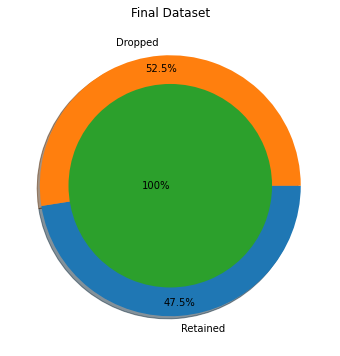


Inference: After the cleanup process, 9885 samples were dropped, while retaining 52.48% of the data.


In [19]:
#Final Dataset size after performing Preprocessing

df = df1.copy()
df.columns=[i.replace('-','_') for i in df.columns]

plt.title('Final Dataset')
plt.pie([df.shape[0], original_df.shape[0]-df.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False,
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True)
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78)
plt.show()

print(f'\n\033[1mInference:\033[0m After the cleanup process, {original_df.shape[0]-df.shape[0]} samples were dropped, \
while retaining {round(100 - (df.shape[0]*100/(original_df.shape[0])),2)}% of the data.')

# 4. Data Manipulation

In [20]:
#Splitting the data intro training & testing sets

m=[]
for i in df.columns.values:
    m.append(i.replace(' ','_'))

df3.columns = m
X = df3.drop([target],axis=1)
Y = df3[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (14924, 26) (14924,) 
Training set  --->  (11939, 26) (11939,) 
Testing set   --->  (2985, 26)  (2985,)


                                       Correlation Matrix                                       


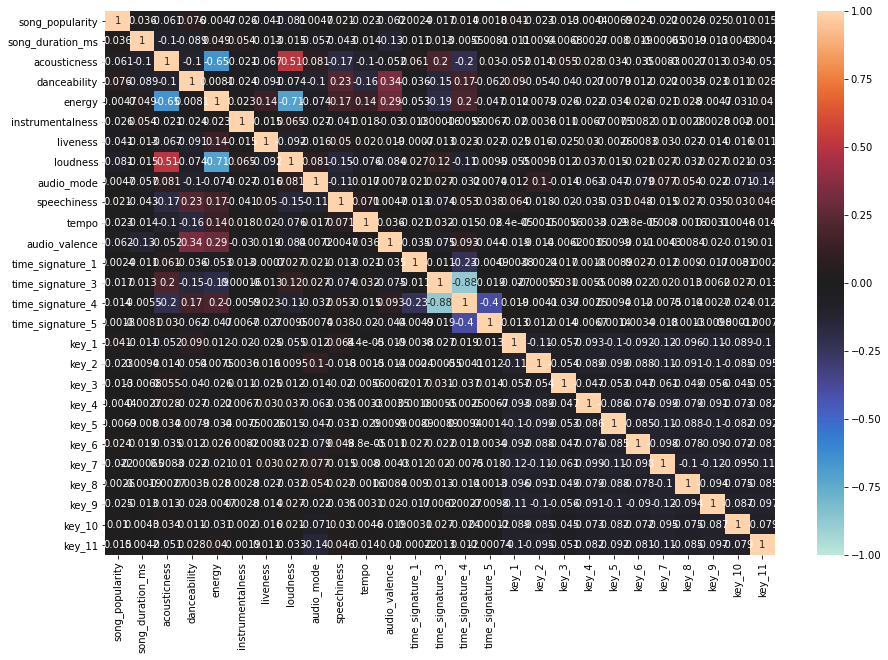

In [21]:
#Checking the correlation

print('\033[1mCorrelation Matrix'.center(100))
plt.figure(figsize=[15,10])
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()

terdapat beberapa multicollinearity pada data. ini harus diatasi karena multicollinearity dapat menyebabkan masalah karena sulit untuk menentukan pengaruh individual dari setiap fitur pada variabel target.

In [22]:
#Testing a Linear Regression model with statsmodels

Train_xy = pd.concat([Train_X,Train_Y.reset_index(drop=True)],axis=1)
a = Train_xy.columns.values

API = api.ols(formula='{} ~ {}'.format(target,' + '.join(i for i in Train_X.columns)), data=Train_xy).fit()
#print(API.conf_int())
#print(API.pvalues)
API.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        song_popularity   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     10.90
Date:                Tue, 11 Jun 2024   Prob (F-statistic):           1.81e-44
Time:                        14:05:12   Log-Likelihood:                -52768.
No. Observations:               11939   AIC:                         1.056e+05
Df Residuals:                   11912   BIC:                         1.058e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           49.3633     11.754      4.200      0.000      26.324      72.402
song_duration_ms -1.034e-06   3.02e-06     -0.343      0.732   -6.95e-06    4.88e-06
acousticness        -2.3145      0.889     -2.605      0.009      -4.056      -0.573
danceability         6.6769      1.415      4.718      0.000       3.903       9.451
energy              -7.7679      1.645     -4.723      0.000     -10.992      -4.544
instrumentalness    -6.8254      0.875     -7.797      0.000      -8.541      -5.109
liveness            -4.2439      1.319     -3.217      0.001      -6.829      -1.658
loudness            -0.3824      0.080     -4.789      0.000      -0.539      -0.226
audio_mode           0.3740      0.402      0.929      0.353      -0.415       1.163
speechiness         -4.9652      1.876     -2.647      0.008      -8.643      -1.288
tempo               -0.0119      0.007     -1.811      0.070      -0.025       0.001
audio_valence       -6.1408      0.886     -6.932      0.000      -7.877      -4.404
time_signature_1     8.0600     11.939      0.675      0.500     -15.342      31.462
time_signature_3     9.3068     11.690      0.796      0.426     -13.607      32.220
time_signature_4    10.1703     11.663      0.872      0.383     -12.692      33.032
time_signature_5    12.3512     11.762      1.050      0.294     -10.704      35.407
key_1                0.7083      0.787      0.900      0.368      -0.835       2.251
key_2               -0.8400      0.808     -1.040      0.298      -2.423       0.743
key_3               -1.0251      1.226     -0.836      0.403      -3.428       1.378
key_4               -0.6281      0.893     -0.703      0.482      -2.378       1.122
key_5                0.0629      0.842      0.075      0.940      -1.588       1.714
key_6                1.7508      0.891      1.965      0.049       0.005       3.497
key_7               -0.6046      0.774     -0.781      0.435      -2.122       0.913
key_8               -0.2671      0.890     -0.300      0.764      -2.012       1.478
key_9               -0.7762      0.814     -0.954      0.340      -2.371       0.819
key_10               1.0380      0.888      1.169      0.243      -0.703       2.779
key_11               0.4764      0.855      0.557      0.577      -1.199       2.152
==============================================================================
Omnibus:                      647.398   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              754.010
Skew:                          -0.612   Prob(JB):                    1.86e-164
Kurtosis:                       2.869   Cond. No.                     3.22e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance m

dari catatan tersebut, nilai eigen yang sangat kecil tersebut menunjukkan adanya masalah multicollinearity yang kuat. untuk mengatasinya, kita akan menggunakan Automatic Method - Recursive Feature Elimination (RFE).

In [ ]:
!pip install --upgrade scikit-learn


# 6. MODELLING

In [23]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize Random Forest Regressor
rf = RandomForestRegressor(random_state=100)

# Perform RFE with Random Forest
n_features_to_select = 13  # Pilih jumlah fitur
rfe = RFE(rf, n_features_to_select=n_features_to_select)
rfe.fit(Train_X, Train_Y)

# Select features
selected_features = Train_X.columns[rfe.support_]

# Fit Random Forest with selected features
rf.fit(Train_X[selected_features], Train_Y)

# Predict on Training and Testing sets
pred_train = rf.predict(Train_X[selected_features])
pred_test = rf.predict(Test_X[selected_features])

# Calculate RMSE for Training and Testing sets
train_rmse = np.sqrt(mean_squared_error(Train_Y, pred_train))
test_rmse = np.sqrt(mean_squared_error(Test_Y, pred_test))

# Calculate R2 Score for Training and Testing sets
train_r2 = r2_score(Train_Y, pred_train)
test_r2 = r2_score(Test_Y, pred_test)

print(f'Training RMSE: {train_rmse}')
print(f'Testing RMSE: {test_rmse}')
print(f'Training R2 Score: {train_r2}')
print(f'Testing R2 Score: {test_r2}')

Training RMSE: 7.8121582128411715
Testing RMSE: 20.016585689008522
Training R2 Score: 0.8524984343811086
Testing R2 Score: 0.048446578911930716


In [24]:
!pip install pyqt5==5.12 pyqtwebengine==5.12 --user

In [25]:
!pip install bayesian-optimization==1.4.1


In [26]:
!pip install --upgrade colorama


Requirement already up-to-date: colorama in c:\users\asus\anaconda3\lib\site-packages (0.4.6)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
from bayes_opt import BayesianOptimization

# Define the function to optimize
def rf_cv(n_estimators, max_depth, min_samples_split, min_samples_leaf, bootstrap):
    rf = RandomForestRegressor(
        n_estimators=int(n_estimators),
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf),
        bootstrap=bool(bootstrap),
        random_state=100
    )
    rf.fit(Train_X.loc[:, rfe.support_], Train_Y)
    pred = rf.predict(Test_X.loc[:, rfe.support_])
    return -np.sqrt(mean_squared_error(Test_Y, pred))

# Set up the parameter bounds for Bayesian Optimization
params = {
    'n_estimators': (100, 500),
    'max_depth': (5, 50), #biasanya pendek
    'min_samples_split': (2, 15),
    'min_samples_leaf': (1, 10),
    'bootstrap': (0, 1)
}

# Perform Bayesian Optimization
optimizer = BayesianOptimization(f=rf_cv, pbounds=params, random_state=100)
optimizer.maximize(init_points=15, n_iter=45)

# Extract best parameters
best_params = optimizer.max['params']
best_params['n_estimators'] = int(best_params['n_estimators'])
best_params['max_depth'] = int(best_params['max_depth'])
best_params['min_samples_split'] = int(best_params['min_samples_split'])
best_params['min_samples_leaf'] = int(best_params['min_samples_leaf'])
best_params['bootstrap'] = bool(int(best_params['bootstrap']))

# Train Random Forest with best parameters
best_rf = RandomForestRegressor(**best_params, random_state=100)
best_rf.fit(Train_X.loc[:, rfe.support_], Train_Y)  # Menggunakan Train_X tanpa scaling

# Predict on Training and Testing sets
pred_train = best_rf.predict(Train_X.loc[:, rfe.support_])
pred_test = best_rf.predict(Test_X.loc[:, rfe.support_])  # Menggunakan Test_X tanpa scaling

# Calculate RMSE for Training and Testing sets
train_rmse_fyb = np.sqrt(mean_squared_error(Train_Y, pred_train))
test_rmse_fyb = np.sqrt(mean_squared_error(Test_Y, pred_test))

# Calculate R2 Score for Training and Testing sets
train_r2_fyb = r2_score(Train_Y, pred_train)
test_r2_fyb = r2_score(Test_Y, pred_test)

print(f'Training RMSE: {train_rmse_fyb}')
print(f'Testing RMSE: {test_rmse_fyb}')
print(f'Training R2 Score: {train_r2_fyb}')
print(f'Testing R2 Score: {test_r2_fyb}')


|   iter    |  target   | bootstrap | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
| 1         | -19.88    | 0.5434    | 17.53     | 4.821     | 12.98     | 101.9     |
| 2         | -19.85    | 0.1216    | 35.18     | 8.433     | 3.777     | 330.0     |
| 3         | -19.85    | 0.8913    | 14.41     | 2.668     | 3.409     | 187.9     |
| 4         | -19.89    | 0.9786    | 41.53     | 2.547     | 12.61     | 209.6     |
| 5         | -19.87    | 0.4317    | 47.3      | 8.359     | 6.369     | 170.2     |
| 6         | -19.92    | 0.3728    | 5.256     | 3.272     | 12.34     | 106.1     |
| 7         | -19.98    | 0.5988    | 32.17     | 1.946     | 6.965     | 114.6     |
| 8         | -19.86    | 0.8904    | 49.14     | 1.539     | 13.58     | 330.8     |
| 9         | -19.88    | 0.7425    | 33.36     | 6.237     | 2.266     | 184.0     |
| 10        | -19.87    | 0.5447    | 39.61     | 3.25

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Inisialisasi model XGBoost
xgb_model = xgb.XGBRegressor(random_state=100)

# Inisialisasi RFE
rfe_xgb = RFE(estimator=xgb_model, n_features_to_select=13, step=1)

# Fit RFE pada data pelatihan dan lakukan seleksi fitur
selected_features_xgb = rfe_xgb.fit_transform(Train_X, Train_Y)

# Latih model XGBoost pada fitur terpilih
xgb_model.fit(selected_features_xgb, Train_Y)

# Prediksi pada data pelatihan dan pengujian
pred_train_xgb = xgb_model.predict(selected_features_xgb)
pred_test_xgb = xgb_model.predict(rfe_xgb.transform(Test_X))

# Hitung RMSE untuk data pelatihan dan pengujian
train_rmse_xgb = np.sqrt(mean_squared_error(Train_Y, pred_train_xgb))
test_rmse_xgb = np.sqrt(mean_squared_error(Test_Y, pred_test_xgb))

# Hitung R2 Score untuk data pelatihan dan pengujian
train_r2_xgb = r2_score(Train_Y, pred_train_xgb)
test_r2_xgb = r2_score(Test_Y, pred_test_xgb)

print(f'XGBoost Training RMSE: {train_rmse_xgb}')
print(f'XGBoost Testing RMSE: {test_rmse_xgb}')
print(f'XGBoost Training R2 Score: {train_r2_xgb}')
print(f'XGBoost Testing R2 Score: {test_r2_xgb}')


In [ ]:
# Define the function to optimize
def xgb_cv(n_estimators, max_depth, learning_rate, subsample, colsample_bytree, gamma, reg_alpha, reg_lambda):
    xgb_model = xgb.XGBRegressor(
        n_estimators=int(n_estimators),
        max_depth=int(max_depth),
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        gamma=gamma,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        random_state=100
    )
    xgb_model.fit(Train_X, Train_Y)
    pred = xgb_model.predict(Test_X)
    return -np.sqrt(mean_squared_error(Test_Y, pred))  # Negative RMSE to maximize

# Set up the parameter bounds for Bayesian Optimization
params = {
    'n_estimators': (100, 500),
    'max_depth': (3, 10),
    'learning_rate': (0.01, 0.3),
    'subsample': (0.6, 1.0),
    'colsample_bytree': (0.6, 1.0),
    'gamma': (0, 0.3),
    'reg_alpha': (0, 0.3),
    'reg_lambda': (0, 0.3)
}

# Perform Bayesian Optimization
optimizer = BayesianOptimization(f=xgb_cv, pbounds=params, random_state=100)
optimizer.maximize(init_points=15, n_iter=45)

# Extract best parameters
best_params = optimizer.max['params']
best_params['n_estimators'] = int(best_params['n_estimators'])
best_params['max_depth'] = int(best_params['max_depth'])

# Train XGBoost with best parameters
best_xgb_model = xgb.XGBRegressor(**best_params, random_state=100)
best_xgb_model.fit(Train_X, Train_Y)

# Predict on Training and Testing sets
pred_train_xgb = best_xgb_model.predict(Train_X)
pred_test_xgb = best_xgb_model.predict(Test_X)

# Calculate RMSE for Training and Testing sets
train_rmse_xgbayes = np.sqrt(mean_squared_error(Train_Y, pred_train_xgb))
test_rmse_xgbayes = np.sqrt(mean_squared_error(Test_Y, pred_test_xgb))

# Calculate R2 Score for Training and Testing sets
train_r2_xgbayes = r2_score(Train_Y, pred_train_xgb)
test_r2_xgbayes = r2_score(Test_Y, pred_test_xgb)

print(f'XGBoost Training RMSE after Bayesian Optimization: {train_rmse_xgbayes}')
print(f'XGBoost Testing RMSE after Bayesian Optimization: {test_rmse_xgbayes}')
print(f'XGBoost Training R2 Score after Bayesian Optimization: {train_r2_xgbayes}')
print(f'XGBoost Testing R2 Score after Bayesian Optimization: {test_r2_xgbayes}')


In [ ]:
import matplotlib.pyplot as plt

# Models
models = ['Random Forest', 'Random Forest Bayesian', 'XGBoost', 'XGBoost Bayesian']

# R2-scores
train_r2_scores = [train_r2, train_r2_fyb, train_r2_xgb, train_r2_xgbayes]
test_r2_scores = [test_r2, test_r2_fyb, test_r2_xgb, test_r2_xgbayes]

# RMSEs
train_rmse_values = [train_rmse, train_rmse_fyb, train_rmse_xgb, train_rmse_xgbayes]
test_rmse_values = [test_rmse, test_rmse_fyb, test_rmse_xgb, test_rmse_xgbayes]

# Plotting R2-score
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
bar_width = 0.35
index = range(len(models))
plt.bar(index, train_r2_scores, width=bar_width, color='b', alpha=0.5, label='Train R2-score')
plt.bar([i + bar_width for i in index], test_r2_scores, width=bar_width, color='r', alpha=0.5, label='Test R2-score')
plt.title('Comparison of R2-score')
plt.xlabel('Models')
plt.ylabel('R2-score')
plt.xticks([i + bar_width/2 for i in index], models, rotation=45)
plt.legend()

# Plotting RMSE
plt.subplot(1, 2, 2)
plt.bar(index, train_rmse_values, width=bar_width, color='g', alpha=0.5, label='Train RMSE')
plt.bar([i + bar_width for i in index], test_rmse_values, width=bar_width, color='y', alpha=0.5, label='Test RMSE')
plt.title('Comparison of RMSE')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.xticks([i + bar_width/2 for i in index], models, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

# Conclusion

1.Pada keseluruhan model yang dicoba, model random forest yang dioptimais menggunakan bayesian memiliki hasil yang paling optimal. Namun, dalam deployment kita akan menggunakan model random forest.

2.Data secara keseluruhan memiliki 18835 sampel dan setelah pre-processing, 52.2% data dihapus.

3.Memvisualisasikan distribusi data dan hubungan antara data, membantu dalam mendapatkan beberapa wawasan tentang set fitur.

4.Pada langkah ekstraksi fitur, kami menemukan adanya multicollinearity yang tinggi di antara fitur-fitur yang tersedia. Multicollinearity adalah kondisi di mana beberapa fitur dalam dataset memiliki hubungan linear yang kuat satu sama lain. Hal ini dapat menyebabkan masalah dalam interpretasi model dan membuat model menjadi tidak stabil. Oleh karena itu, untuk mengatasi masalah ini, kami menerapkan teknik Recursive Feature Elimination (RFE). RFE adalah metode yang digunakan untuk memilih fitur-fitur yang paling penting dalam dataset dengan cara secara berulang memilih subset fitur dan membangun model dengan subset tersebut, kemudian memilih fitur-fitur yang memberikan kontribusi terendah terhadap kinerja model dan menghapusnya. Proses ini dilakukan secara berulang hingga jumlah fitur yang tersisa sesuai dengan yang diinginkan. Dengan menggunakan RFE, kami berhasil memilih subset fitur yang paling informatif dan relevan untuk digunakan dalam pembangunan model kami, sehingga meningkatkan interpretabilitas dan kinerja model.

5.Pada langkah evaluasi model, kami menyarankan untuk melakukan validasi model yang lebih komprehensif menggunakan metode seperti cross-validation. Dengan melakukan validasi model yang lebih luas, kita dapat memastikan keandalan dan generalisasi model yang lebih baik. Hal ini akan membantu dalam mengidentifikasi apakah model memiliki performa yang stabil dan dapat diandalkan ketika diimplementasikan dalam situasi dunia nyata.


In [ ]:
import pickle

In [ ]:
filename = 'rfb_pickled.sav'
pickle.dump(best_rf,open(filename,'wb'))


In [ ]:
loaded_model = pickle.load(open(filename,'rb'))
loaded_model.predict(Train_X.loc[:, rfe.support_])

In [ ]:
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf, file)


In [ ]:
# Muat model dari file pickle
with open('rf_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [ ]:
with open('rfb_models.pkl', 'wb') as file:
    pickle.dump(best_rf, file)


In [ ]:
# Muat model dari file pickle
with open('rfb_models.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [ ]:
pred_test = best_rf.predict(Test_X.loc[:, rfe.support_])
print(pred_test)

In [ ]:
pred_train = best_rf.predict(Train_X.loc[:, rfe.support_])
print(pred_train)

In [ ]:
print("Number of features in the input dataframe:", len(df3.columns))

In [ ]:
print("Number of features in the model:", len(best_rf.feature_importances_))

In [ ]:
print("Number of features in the model:", len(rf.feature_importances_))